# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [2]:
visa = "EasyVisa.csv"

In [3]:
visa = pd.read_csv(visa)

In [4]:
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
data.shape

(25480, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
data.duplicated().sum() 

0

In [10]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Data Description:**

* The dataset has 25480 rows and 12 columns of data.
* There are no duplicated or null values in the dataset.
* All the variables are of data type object expect for number of employees, year of establishment which are of int 64 data type whiles  prevailing wage is of the float data type.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [11]:
data.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV23971,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.drop(['case_id'], axis = 1, inplace = True)

In [13]:
data["no_of_employees"] = abs(
    data["no_of_employees"])

In [14]:
b  = data[data["no_of_employees"] < 0]

In [15]:
b["no_of_employees"].value_counts()

Series([], Name: no_of_employees, dtype: int64)

**Data Cleaning:**
* Case ID is an ID variable and not useful for predictive modeling, so variable was dropped.
* Number of employees had some negative values and I decided to take the absolute value of them to get them all positive.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [16]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

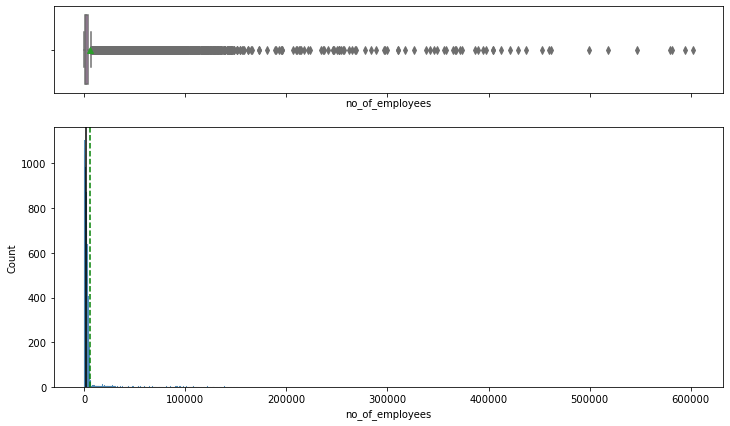

In [19]:
histogram_boxplot(data, "no_of_employees")

**Observation:**
The number of employees of the employer is positively skewed indicating that there are employers that have large number of employees.

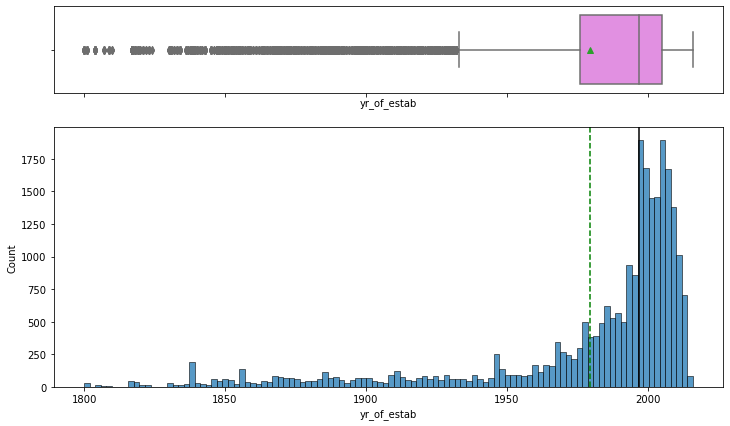

In [20]:
histogram_boxplot(data, "yr_of_estab")

**Observation:**
The year of establishment of the employer company is negatively skewed indicating that there are some very old companies.
That some companies were establish very long time ago

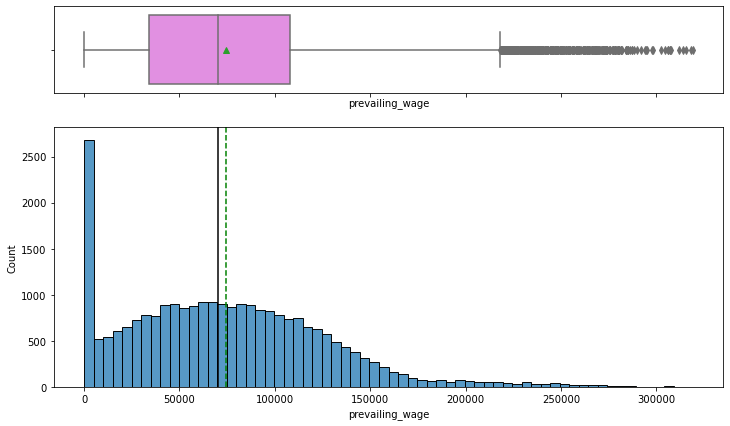

In [21]:
histogram_boxplot(data, "prevailing_wage")

**Observation:**
The prevailing wage is positively skewed indicating that some foriegn workers will be getting paid higher incomes as their indigenuous counterpart for the same level of service.

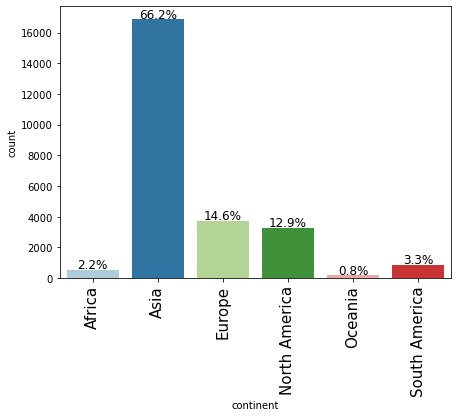

In [22]:
labeled_barplot(data, "continent", perc=True)

**Observations -**
* More than half of the applicants were from Asia at 66.2% whiles 14.6% were from Europe followed by North America.

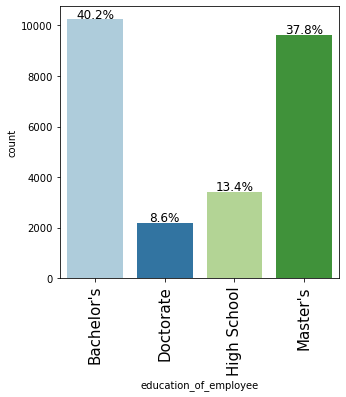

In [23]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observations -**
* Most of the applicants have Bachelors degree at 40.2% closely followed by Masters degree holders at 37.8%

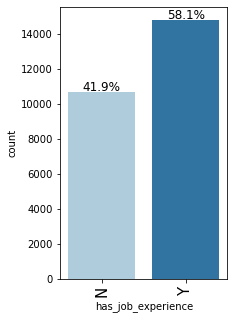

In [24]:
labeled_barplot(data, "has_job_experience", perc=True)

**Observations -**
* More than half of the applicants do have job experience.

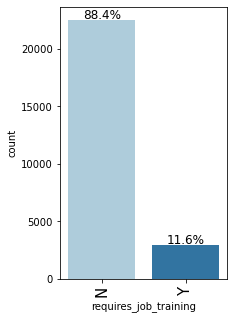

In [25]:
labeled_barplot(data, "requires_job_training", perc=True)

**Observations -**
* Majority of the applicants at 88.4% do not require job training.

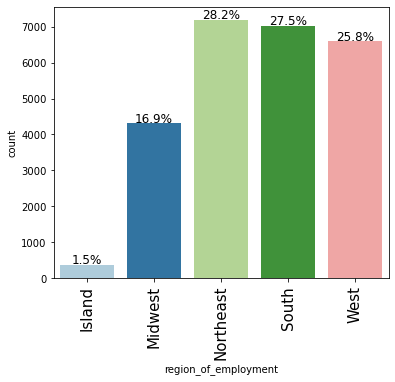

In [26]:
labeled_barplot(data, "region_of_employment", perc=True)

**Observations -**
* The Northeast region has the most jobs available for employment, closely followed by the south then the West. 
* Few jobs are available on the Islands

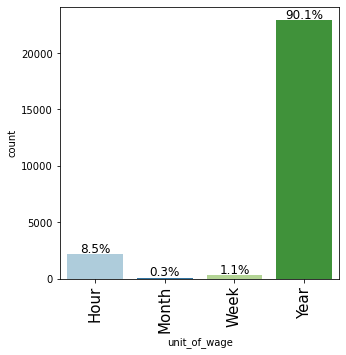

In [27]:
labeled_barplot(data, "unit_of_wage", perc=True)

**Observations -**
* Close to a 100% of the jobs are giving yearly salaries, followed by hourly waged jobs.

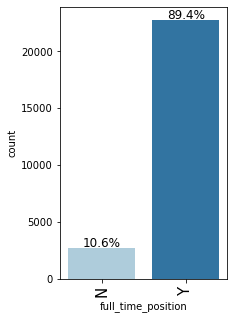

In [28]:
labeled_barplot(data, "full_time_position", perc=True)

**Observations -**
* More than half of the applicants are looking for fulltime positions.

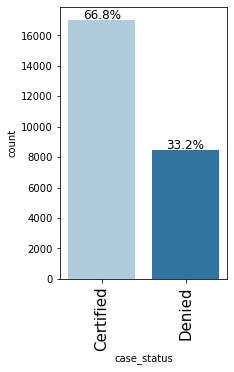

In [29]:
labeled_barplot(data, "case_status", perc=True)

**Observations -**
* Two thirds of the applicants were issued visas and 33.2%  were denied.

In [30]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


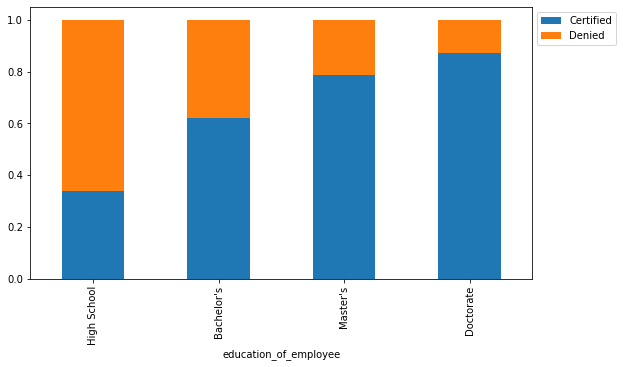

In [31]:
stacked_barplot(data, "education_of_employee", "case_status")

**Observations -**
* Visa application cases that were made by High school graduates were the most denied of all the applications.
* Amongst the cases that were certified, applicants with docterate degree were highest.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


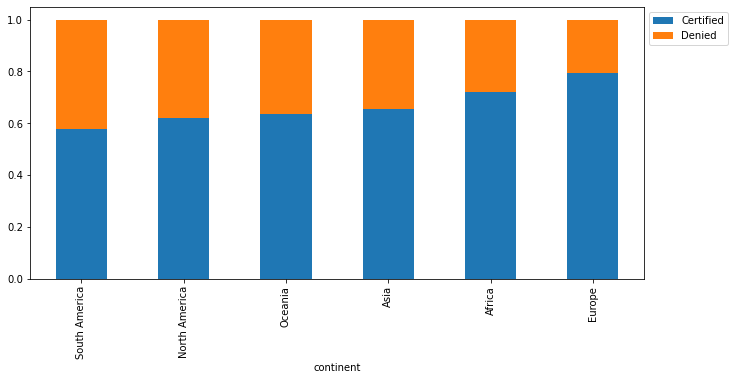

In [32]:
stacked_barplot(data, "continent", "case_status")

**Observations -**
* On average, there seem not to be much of a difference in visa certification amongst different continents
* Also Europe had the most certification followed by Africa, then Asia.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


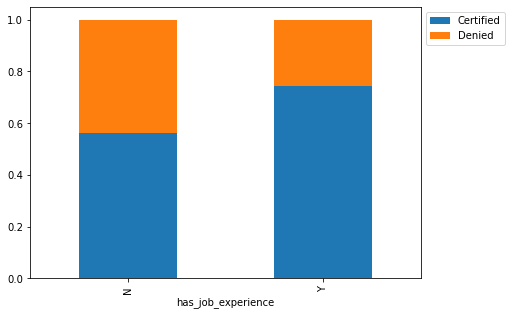

In [33]:
stacked_barplot(data, "has_job_experience", "case_status")

**Observations -**
* Most visas applied for by employees who did not have experience were denied  .
* the proportion of has visa that were certified were higher for employees who had job experience. 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


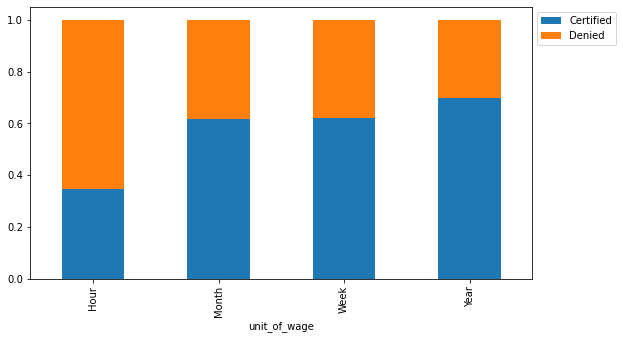

In [34]:
stacked_barplot(data, "unit_of_wage", "case_status")

**Observations -**
* Jobs applied for that had an hourly rate compensation were the most denied of all the applications.
* Amongst the cases that were certified, jobs with yearly compensation were highest.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


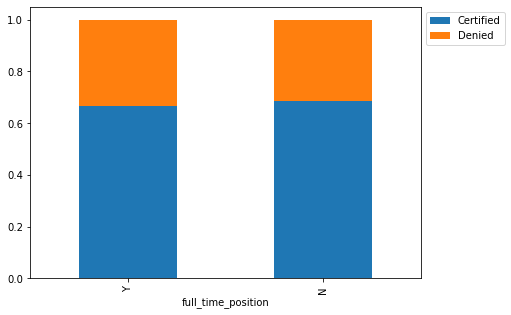

In [35]:
stacked_barplot(data, "full_time_position", "case_status")

**Observations -**
* Looking at the bar graph the proportion of visa application that were certified was almost the same for applicants who were looking for fulltime position as applicants who did not want full time positions


case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


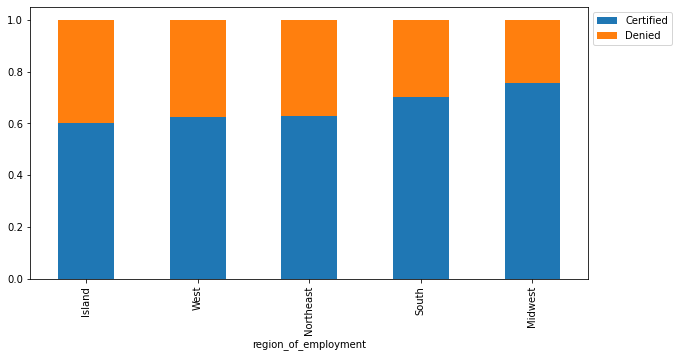

In [36]:
stacked_barplot(data, "region_of_employment", "case_status")

**Observations -**
* Visa application cases for jobs on the Island were the most denied of all the applications.
* Also there does not seem to be much of a difference in the applications certified amongst the region of employment.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


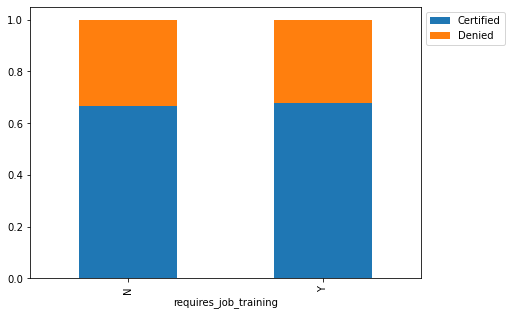

In [37]:
stacked_barplot(data, "requires_job_training", "case_status")

**Observations -**
* Looking at the bar graph the proportion of visa application that were certified was almost the same whether the applicant require job training or not

has_job_experience         N      Y    All
requires_job_training                     
All                    10678  14802  25480
N                       8988  13537  22525
Y                       1690   1265   2955
------------------------------------------------------------------------------------------------------------------------


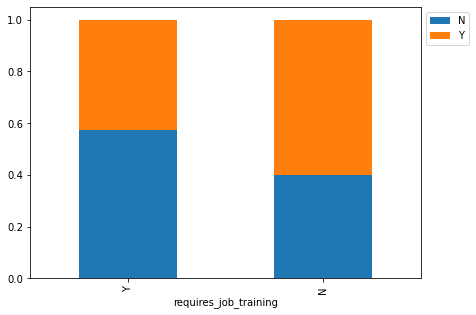

In [38]:
stacked_barplot(data, "requires_job_training", "has_job_experience")

**Observations -**
* Most of the applicants who had job experience did not require job training

has_job_experience      N      Y    All
full_time_position                     
All                 10678  14802  25480
Y                    9381  13392  22773
N                    1297   1410   2707
------------------------------------------------------------------------------------------------------------------------


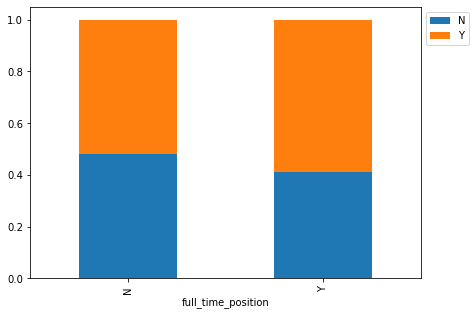

In [39]:
stacked_barplot(data, "full_time_position", "has_job_experience")

**Observations -**
* Most of the applicants who had job experience wanted full time positions.

In [40]:

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

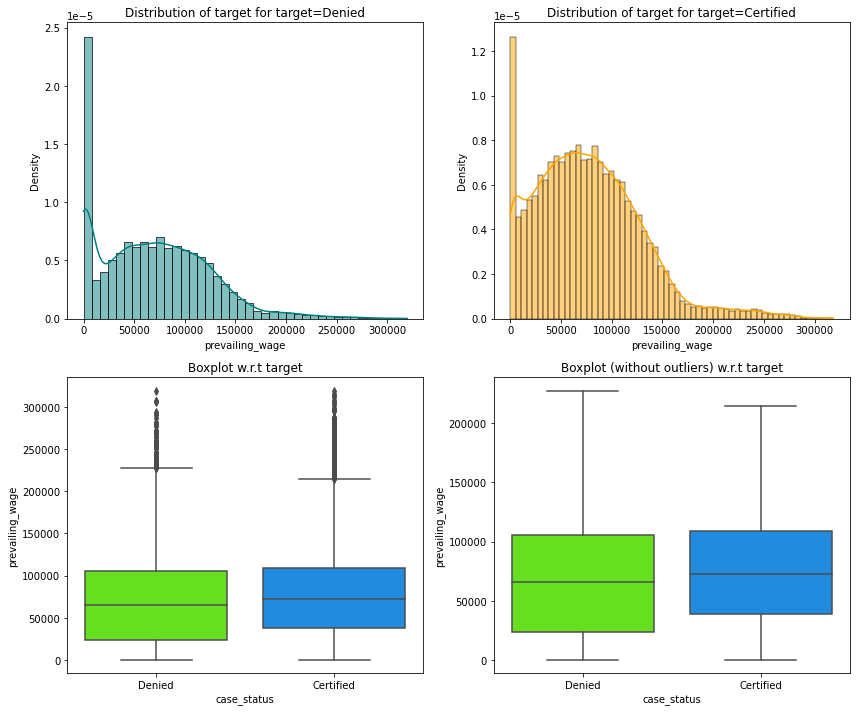

In [41]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

**Observation**
- We can see that the second and third quartiles of prevailing wage of certified is much more than the second and third quartiles of prevailing wage of denied.
- This shows that applicants with higher prevailing wage are more likely to certified.

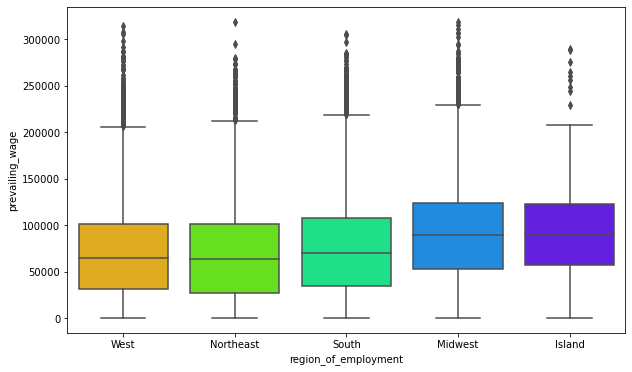

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, y="prevailing_wage", x="region_of_employment", palette="gist_rainbow"
)
plt.show()

**Observations -**
* There seem to be a right skewed distribution for all region of employment with respect to prevailing wage. 
* Island has the highest prevailing wage on Average 
* Northeast and Midwest appear to have the maximum prevailing wage

In [43]:
def corr_heatmap(num_corr):
    plt.figure(figsize=(14, 10))

    mask = np.triu(np.ones_like(num_corr.corr(), dtype=np.bool))
    sns.axes_style("white")
    heat_map = sns.heatmap(
        num_corr.corr(), mask=mask, annot=True, vmin=-1, vmax=1, cmap="coolwarm"
    )
    plt.title("Correlation  Heatmap")
    plt.show()

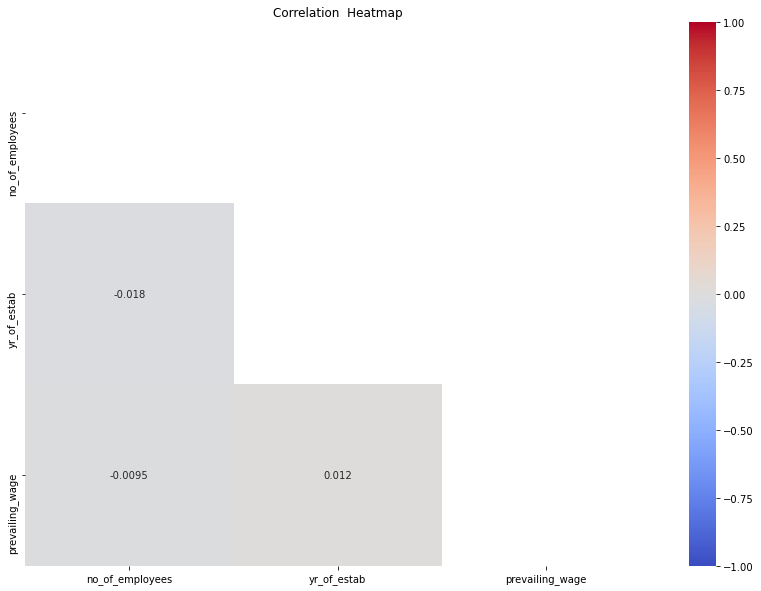

In [44]:
corr_heatmap(data)

**Observations -**
* There is no correlations between any of the variables.


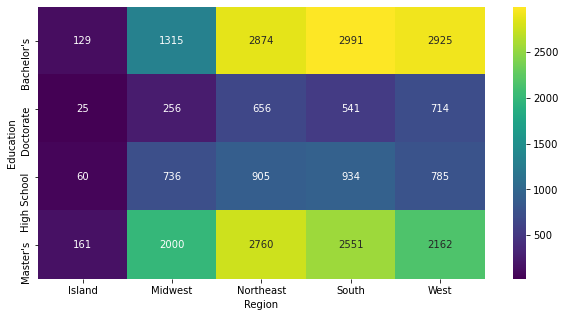

In [45]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Observations -**
* Most people with Bachelors degree has job from the South followed by West and then NorthEast
* Few doctorate holders have job offers on the Island

In [46]:
import scipy.stats as stats

In [47]:
crosstab = pd.crosstab(
    data["education_of_employee"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "education_of_employe has no effect on case_status"  # Stating the Null Hypothesis
Ha = "education_of_employe has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

education_of_employe has an effect on case_status as the p_value (0.0) < 0.05


In [48]:
crosstab = pd.crosstab(
    data["has_job_experience"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "has_job_experience has no effect on case_status"  # Stating the Null Hypothesis
Ha = "has_job_experience has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

has_job_experience has an effect on case_status as the p_value (0.0) < 0.05


In [49]:
crosstab = pd.crosstab(
    data["requires_job_training"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "requires_job_training has no effect on case_status"  # Stating the Null Hypothesis
Ha = "requires_job_training has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

requires_job_training has no effect on case_status as the p_value (0.186) > 0.05


In [50]:
crosstab = pd.crosstab(
    data["full_time_position"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "full_time_position has no effect on case_status"  # Stating the Null Hypothesis
Ha = "full_time_position has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

full_time_position has an effect on case_status as the p_value (0.045) < 0.05


In [51]:
crosstab = pd.crosstab(
    data["region_of_employment"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "region_of_employment has no effect on case_status"  # Stating the Null Hypothesis
Ha = "region_of_employment has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

region_of_employment has an effect on case_status as the p_value (0.0) < 0.05


In [52]:
crosstab = pd.crosstab(
    data["continent"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "continent has no effect on case_status"  # Stating the Null Hypothesis
Ha = "continent has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

continent has an effect on case_status as the p_value (0.0) < 0.05


In [53]:
crosstab = pd.crosstab(
    data["unit_of_wage"], data["case_status"]
)  # Contingency table of FICO and home_ownership attributes

Ho = "unit_of_wage has no effect on case_status"  # Stating the Null Hypothesis
Ha = "unit_of_wage has an effect on case_status"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

unit_of_wage has an effect on case_status as the p_value (0.0) < 0.05


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

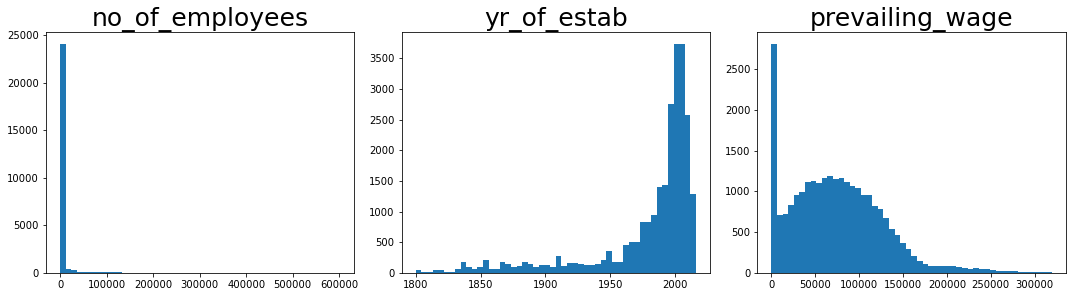

In [54]:
dist_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

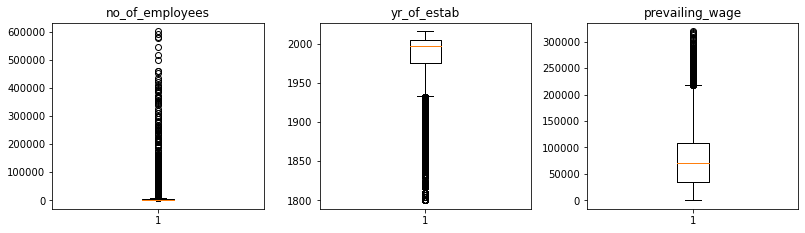

In [55]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("case_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations -**
* Both boxplot and histogram shows all the numeric variables have outliers and hence we should proceed with caution.

In [56]:
data["case_status"] = np.where(data["case_status"] == "Certified", 1, 0)

In [57]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


**OBservations**

Converting the case staatus column to 1 for certified and 0 for denied.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [84]:
X = data.drop("case_status", axis=1)
Y = data["case_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)


# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [85]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (20384, 21)
Shape of test set :  (5096, 21)
Percentage of classes in training set:
1    0.667877
0    0.332123
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


In [86]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [87]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [88]:
model = DecisionTreeClassifier(criterion="gini", class_weight= 'balanced', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

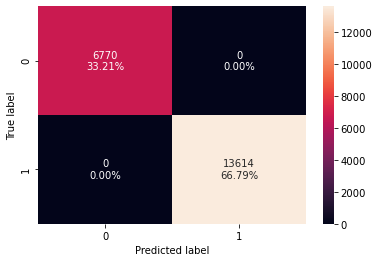

In [89]:
confusion_matrix_sklearn(model, X_train, y_train)

**Confusion Matrix -**

* Visa certified and the model predicted it correctly that the visa will be certified:  True Positive (observed=1,predicted=1)

* Visa denied and the model predicted visa will be certified : False Positive (observed=0,predicted=1)

* Visa denied and the model predicted visa will be denied: True Negative (observed=0,predicted=0)

* Visa certified and the model predicted visa will be denied : False Negative (observed=1,predicted=0)

In [92]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

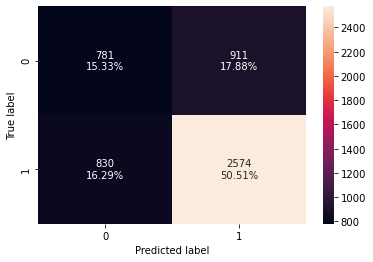

In [93]:
confusion_matrix_sklearn(model, X_test, y_test)

In [94]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.658359,0.756169,0.738594,0.747278


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.
* F1_score is lower on the test dataset at 74.7% compared to the 100% on the training.

In [95]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)


parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv=5) 
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

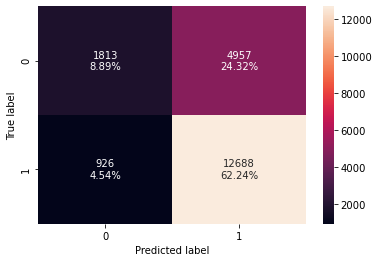

In [96]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [97]:
decision_tree_tuned_perf_train = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
decision_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.711391,0.931982,0.719071,0.811798


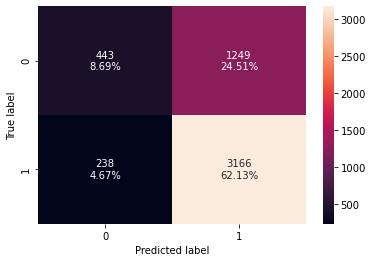

In [98]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [99]:
decision_tree_tuned_perf_test = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
decision_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.708203,0.930082,0.717101,0.809822


* After tunning the F1 score is much better, there is not a significant difference between the training and test compared to the previous model

## Building bagging and boosting models

In [100]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

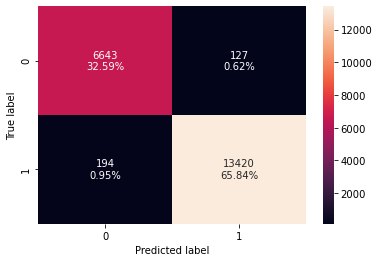

In [101]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [103]:
bagging_estimator_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train, y_train)
print("Training performance \n",bagging_estimator_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.984252  0.98575   0.990625  0.988182


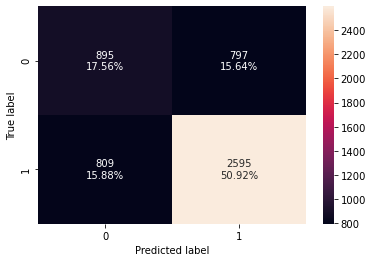

In [104]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [105]:
bagging_estimator_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Training performance \n",bagging_estimator_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.684851  0.762338   0.765035  0.763685


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.
* F1_score is lower on the test dataset at 76.3% compared to the 98.8% on the training.

##  Will tuning the hyperparameters improve the model performance?

In [83]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,], 
              'max_features': [0.7,0.8,0.9,],
              'n_estimators' : [90,120,10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=120,
                  random_state=1)

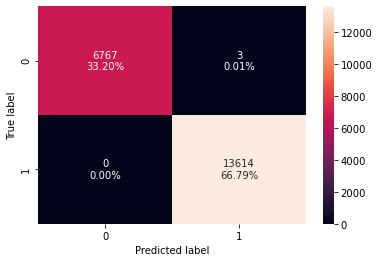

In [113]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [110]:
bagging_estimator_tuned_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Training performance \n",bagging_estimator_tuned_train_perf)

Training performance 
    Accuracy  Recall  Precision       F1
0  0.999853     1.0    0.99978  0.99989


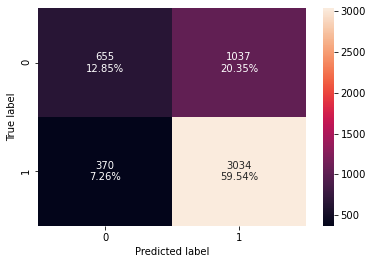

In [111]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [112]:
bagging_estimator_tuned_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Training performance \n",bagging_estimator_tuned_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.723901  0.891304   0.745271  0.811773


### Insights
- We can see that both the train and test F1 score for the bagging classifier have increased much after hyperparameter tuning.
- The model is overfitting the data, as train f1 is much higher than the test f1 score.
- The confusion matrix shows that the model is better at identifying certified visas as compared to denied visas.

### Random Forest

In [114]:
rf_estimator=RandomForestClassifier(class_weight="balanced", random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

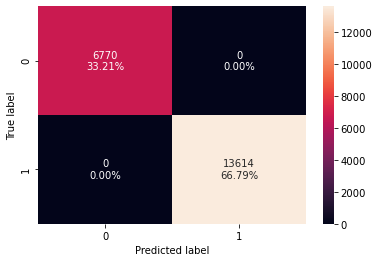

In [115]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [116]:
rf_estimator_train_perf=model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Training performance \n",rf_estimator_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


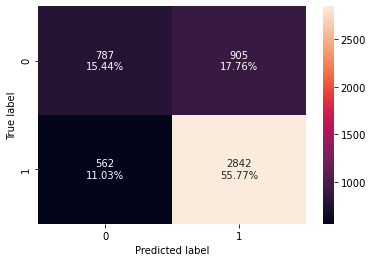

In [117]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [118]:
rf_estimator_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Training performance \n",rf_estimator_test_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.712127  0.8349   0.758473  0.794854


* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.
* F1_score is lower on the test dataset at 79.5% compared to the 100% on the training.

In [119]:
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=30, random_state=1)

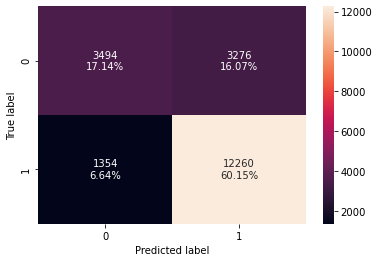

In [120]:
confusion_matrix_sklearn(rf_estimator_tuned, X_train, y_train)

In [121]:
rf_estimator_tuned_train_perf=model_performance_classification_sklearn(rf_estimator_tuned, X_train, y_train)
print("Training performance \n",rf_estimator_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.772861  0.900544   0.789135  0.841166


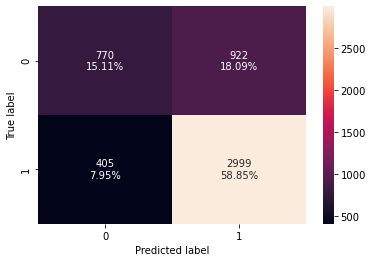

In [122]:
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

In [123]:
rf_estimator_tuned_test_perf=model_performance_classification_sklearn(rf_estimator_tuned, X_test, y_test)
print("Training performance \n",rf_estimator_tuned_test_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0    0.7396  0.881022   0.764856  0.81884


* After tunning the F1 score is much better, there is not a significant difference between the training and test compared to the previous model

### AdaBoost Classifier

In [124]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

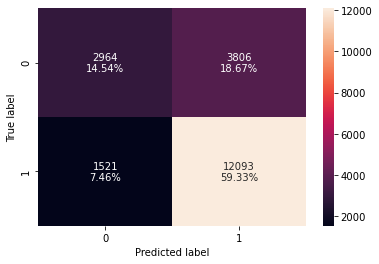

In [125]:
confusion_matrix_sklearn(abc, X_train, y_train)

In [126]:
abc_train_perf=model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance \n", abc_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738668  0.888277   0.760614  0.819503


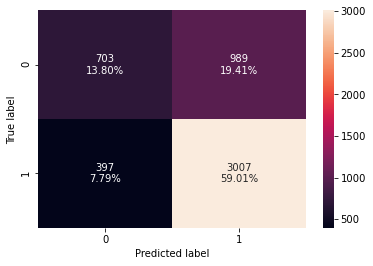

In [127]:
confusion_matrix_sklearn(abc, X_test, y_test)

In [128]:
abc_test_perf=model_performance_classification_sklearn(abc, X_test, y_test)
print("Training performance \n", abc_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.728022  0.883373   0.752503  0.812703


* There is not a significant difference between the training and test dataset with respct to the F1
* this shows that the model is not overfitting

In [129]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

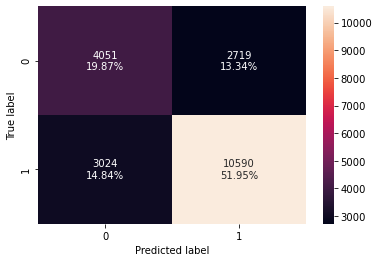

In [130]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [131]:
abc_tuned_train_perf=model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance \n", abc_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738668  0.888277   0.760614  0.819503


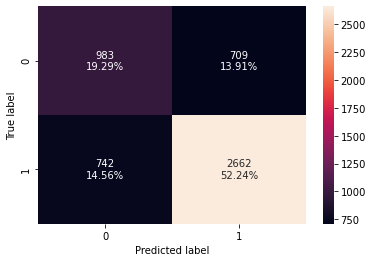

In [132]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [133]:
abc_tuned_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Training performance \n", abc_tuned_test_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.715267  0.782021   0.789677  0.78583


* After tunning the F1 score is slightly decreased for the test dataset, but there is not a significant difference between the training and test compared to the previous model

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [134]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

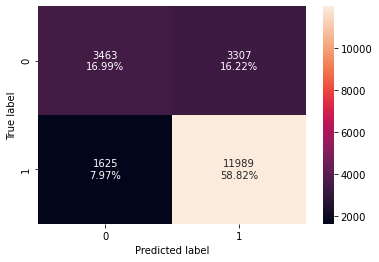

In [135]:
confusion_matrix_sklearn(gbc_init, X_train, y_train)

In [136]:
gbc_init_train_perf=model_performance_classification_sklearn(gbc_init, X_train, y_train)
print("Training performance \n", gbc_init_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.758046  0.880638     0.7838  0.829402


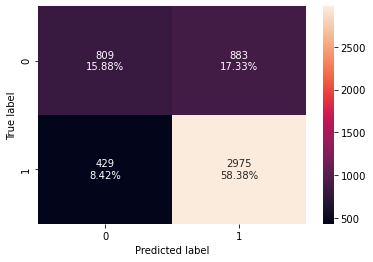

In [137]:
confusion_matrix_sklearn(gbc_init, X_test, y_test)

In [138]:
gbc_init_test_perf=model_performance_classification_sklearn(gbc_init, X_test, y_test)
print("Training performance \n", gbc_init_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.742543  0.873972   0.771125  0.819334


In [139]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=300, random_state=1,
                           subsample=0.9)

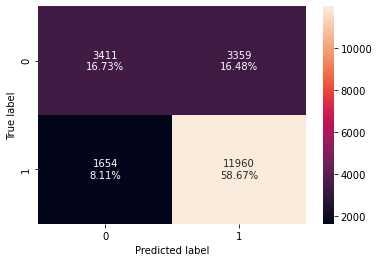

In [144]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [145]:
gbc_tuned_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance \n", gbc_tuned_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.754072  0.878507    0.78073  0.826738


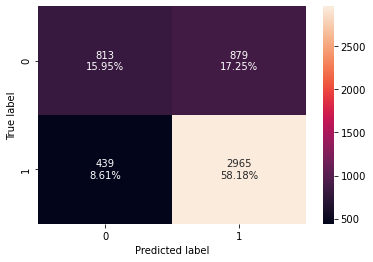

In [146]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [147]:
gbc_tuned_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Training performance \n", gbc_tuned_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.741366  0.871034   0.771332  0.818157


### Insights
- This is not much of a difference in the trainiing and testing datasets. F1 scores at both are not far off eachother.
- This shows model is not overfitting

### Stacking Classifier

In [148]:
estimators=[('AdaBoost', abc_tuned),('Random Forest', rf_estimator_tuned),
           ('Decision Tree', dtree_estimator), ('Bagging', bagging_estimator_tuned), ]

final_estimator=gbc_tuned 

In [149]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=90,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       n_estimators=30,
                                                       rando

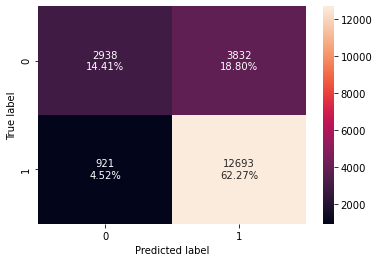

In [150]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train)

In [151]:
stacking_estimator_train_perf=model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print("Training performance \n", stacking_estimator_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.766827  0.932349   0.768109  0.842297


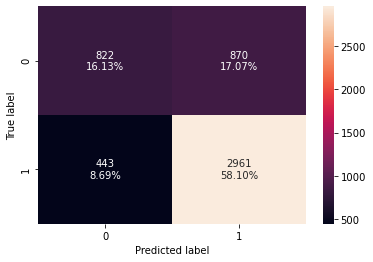

In [152]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

In [153]:
stacking_estimator_test_perf=model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Training performance \n", stacking_estimator_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.742347  0.869859   0.772905  0.818521


## Model Performance Comparison and Conclusions

In [154]:

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tuned_perf_train.T,
        bagging_estimator_train_perf.T,
        bagging_estimator_tuned_train_perf.T,
        rf_estimator_train_perf.T,
        rf_estimator_tuned_train_perf.T,
        abc_train_perf.T,
        abc_tuned_train_perf.T,
        gbc_init_train_perf.T,
        gbc_tuned_train_perf.T,
        stacking_estimator_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,1.0,0.711391,0.984252,0.999853,1.0,0.772861,0.738668,0.738668,0.758046,0.754072,0.766827
Recall,1.0,0.931982,0.985750,1.000000,1.0,0.900544,0.888277,0.888277,0.880638,0.878507,0.932349
Precision,1.0,0.719071,0.990625,0.999780,1.0,0.789135,0.760614,0.760614,0.783800,0.780730,0.768109
F1,1.0,0.811798,0.988182,0.999890,1.0,0.841166,0.819503,0.819503,0.829402,0.826738,0.842297


In [155]:

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tuned_perf_test.T,
        bagging_estimator_test_perf.T,
        bagging_estimator_tuned_test_perf.T,
        rf_estimator_test_perf.T,
        rf_estimator_tuned_test_perf.T,
        abc_test_perf.T,
        abc_tuned_test_perf.T,
        gbc_init_test_perf.T,
        gbc_tuned_test_perf.T,
        stacking_estimator_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,0.658359,0.708203,0.684851,0.723901,0.712127,0.739600,0.728022,0.715267,0.742543,0.741366,0.742347
Recall,0.756169,0.930082,0.762338,0.891304,0.834900,0.881022,0.883373,0.782021,0.873972,0.871034,0.869859
Precision,0.738594,0.717101,0.765035,0.745271,0.758473,0.764856,0.752503,0.789677,0.771125,0.771332,0.772905
F1,0.747278,0.809822,0.763685,0.811773,0.794854,0.818840,0.812703,0.785830,0.819334,0.818157,0.818521


* The f1 score on the test dataset is highest for the Gradient Boost Classifier and hence we pick that for our model prediction.
* Other models like Tuned Random Forst, Tuned Gradient Boost Classifier and the Stacking classifiers were not far off, looking at their f1 scores.

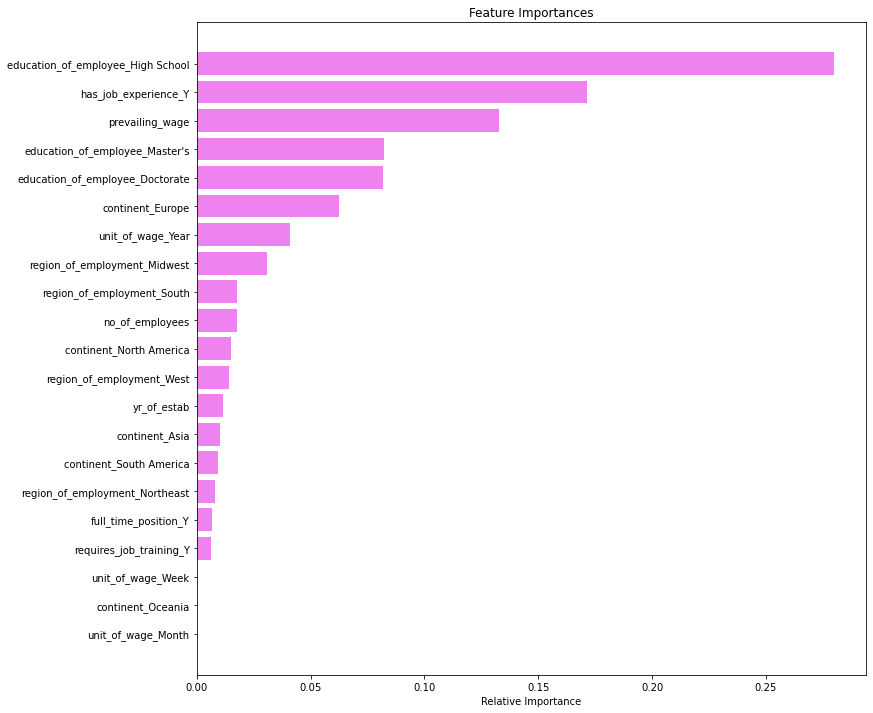

In [156]:
feature_names = X_train.columns
importances = gbc_init.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education of employee is the most important feature for prediction followed by has Job experience, and then prevailing wage.

## Actionable Insights and Recommendations

## Business Insights and Recommendations

* We have been able to build a predictive model:
  a) that company can deploy this model to identify which visa applicatons should be certified.
  b) that company can use to find the contributors of visa case status. 
  c) based on which company can take appropriate actions to build better application policies. 
 
* we identified the f1 score as the best metric as both False Positive and False negative are both important in this situation. To minimise both errors we could not only focus on Recall or just on Precision. F1 in this instance is the best ideal.

* Factors that drive visa certification - Education of Employees, whether the applicant has job experience, and prevailing wage.
* Education of employees: Applicants with higher education are granted more visas, which is also logical as people with higher education tend to be good in their field of work - the company should encourage applicants with higher eduation to apply more by issuing more visas.

* Has Job experience: Those employees who have more industry experince in their field of work tend to be given more visa approval. - the company should encourage more applicants to gain more industry experience before applying to better their chances of visa approval.

* prevailing wage: applicants with higher prevailing wage are more likely to certified. These applicants are more likely to be highly educated and perhaps have lots of job experience 

* Requires Job training: Applicants who did not need extensive job training were granted visas. This goes hand in hand with industry experience. If someone has experience they require minimal or no job training.

* Continent: Even though most applicant were from Asia, European applicants were granted more visas. The company should look into this and advise the visa consulate so that they are not likely as being discriminatory. 

* Region of employment doesn't seem to have an impact on case status- This makes some sense as where in the person works in the Us shouldn't determine whether or not they get a visa.

* unit of wage: This also seem to affct visa application decisions. Most people who are on yearly renumerations tend to be certified. 